In [18]:
import os
import sys

# Set working directory
plant_clef_root = '/home/ffw/workspace/plantCLEF/'
os.chdir(plant_clef_root)

data_dir = os.path.join(plant_clef_root, 'data')

import numpy as np
import sklearn
import scipy
import scipy.misc
import time
import logging

import matplotlib.pyplot as plt
%matplotlib inline

from utilities import *
import mcl

import caffe
from caffe import layers as L
caffe.set_mode_gpu()

import mcl.nets.scatnet_net
reload(mcl.nets.scatnet_net)
from mcl.nets.scatnet_net import scatnet, gen_prototxt, get_layers_sizes

import re


In [118]:
log_string = !cat /tmp/caffe.ffw-gpu01.ffw.log.INFO.20160624-101159.19379
print len(log_string)

33225


In [121]:

log = {}
iteration = -1
for line in log_string:    
    if not "]" in line:
        continue
    
    s = line.split("]")[1].strip()
    
    iteration_match = re.findall('Iteration ([0-9]+)', s)
    if iteration_match:
        iteration = int(iteration_match[0])
            
    values = re.findall('(\S+) = (\S+)', s)    
    if values:
        key, value = values[0]
        if key not in log:
            log[key] = {}                            
        log[key][iteration] = float(value)
        
del log['probs']

ValueError: Data has no positive values, and therefore can not be log-scaled.

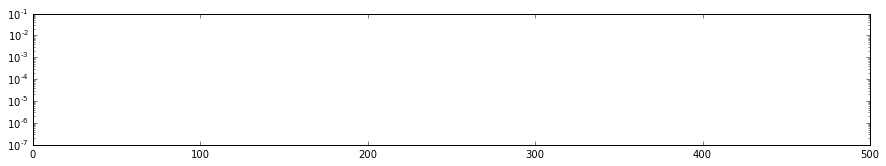

In [120]:


plt.figure(figsize=(15,8))
#i, acc = zip(*sorted(log['acc'].items()))
for i, k in enumerate(log.keys()):
    plt.subplot(len(log.keys()), 1, i+1)
    plt.semilogy(*zip(*sorted(log[k].items())))
    plt.title(k)
